# Projet ModIA: IA Frameworks

Dans ce projet, vous allez travailler sur des données<sup>[1](#myfootnote1)</sup> issues du site [Food.com](https://www.food.com/), un célèbre site de recettes de cuisine.   

![Image food](../img/food.png)

Les données, disponibles [ici](https://drive.google.com/drive/folders/18JyoxTIrIH2s2wG6HtxGiKsdFtGSfUWm?usp=sharing), contiennent des informations sur des recettes de cuisines ainsi que des interactions de plusieurs utilisateurs avec les recettes.   

## Consignes:
Les parties 1, 2 et 3 sont à réaliser dans un même notebook.
### Partie 1: Recommandations simples:
Dans __un notebook__
*   Présentez plusieurs stratégies de recommandation  de recettes:
    *   Par popularité
    *   Selon les étapes de la recette (colonne steps)
    *   Selon la description de la recette 

    Pour chacune de ces méthodes montrez quelques exemples des recommandation  obtenues.

## Partie 0: Librairies, Données et Exploration

### 0.0 Librairies et Données

Librairies utilisées :

In [1]:
# data
import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# machine learning
import sklearn

# display
from IPython.display import display, HTML

In [2]:
sns.set_style('white')
# plt.xkcd()
mpl.rcParams['font.family'] = ['DejaVu Sans']

Ouverture des données :

In [3]:
interactions_train = pd.read_csv('../data/interactions_train.csv') # user to train recommender 
interactions_test = pd.read_csv('../data/interactions_test.csv') # used to predict the ratings

raw_interactions = pd.read_csv('../data/RAW_interactions.csv') # sentiment analysis
raw_recipes = pd.read_csv('../data/RAW_recipes.csv') # used for recommender

test_script = pd.read_csv('../data/test_script.csv') 

print(f"There is a total of {interactions_train.shape[0]} interactions and {raw_recipes.shape[0]} recipes")

There is a total of 698901 interactions and 231637 recipes


In [79]:
name_description_ingredient = (
    raw_recipes["name"] + " " \
    + raw_recipes["description"] + " " \
    + raw_recipes["ingredients"]
)

In [81]:
name_description_ingredient[0]

"arriba   baked winter squash mexican style autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions. ['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"

In [80]:
name_description_ingredient

0         arriba   baked winter squash mexican style aut...
1         a bit different  breakfast pizza this recipe c...
2         all in the kitchen  chili this modified versio...
3         alouette  potatoes this is a super easy, great...
4         amish  tomato ketchup  for canning my dh's ami...
                                ...                        
231632    zydeco soup this is a delicious soup that i or...
231633    zydeco spice mix this spice mix will make your...
231634    zydeco ya ya deviled eggs deviled eggs, cajun-...
231635    cookies by design   cookies on a stick i've he...
231636    cookies by design   sugar shortbread cookies i...
Length: 231637, dtype: object

In [87]:
raw_recipes.head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


### 0.1 Exploration

#### a. Quelques statistiques descriptives

In [4]:
# Get all unique user ids from train and test
train_users = interactions_train['user_id'].unique()
test_users = interactions_test['user_id'].unique()

# concatenate users and return unique values
all_users = np.unique(np.concatenate((train_users, test_users), axis=0))

# Get all unique recipe ids from train and test
train_recipes = interactions_train['recipe_id'].unique()
test_recipes = interactions_test['recipe_id'].unique()

# concatenate recipes and return unique values
all_recipes = np.unique(np.concatenate((train_recipes, test_recipes), axis=0))

print('Number of unique users: {}'.format(len(all_users)))
print('Number of unique recipes: {}'.format(len(all_recipes)))

Number of unique users: 25076
Number of unique recipes: 172596


In [ ]:
# compute value counts of recipes
recipe_counter = interactions_train['recipe_id'].value_counts()
# most_common_recipe = recipe_counter.idxmax()
# most_common_recipe_count = recipe_counter.max()

# print the 5 most popular recipes and their name
top_10_recipes = recipe_counter[:5]
top_10_recipe_ids = top_10_recipes.index
top_10_recipe_counts = top_10_recipes.values

print('Top 5 recipes:')
for i in range(5):
    print('Recipe id: {}'.format(top_10_recipe_ids[i]))
    print('Number of times it appears: {}'.format(top_10_recipe_counts[i]))
    print('Average rating: {}'.format(
        interactions_train.query(f'recipe_id == @top_10_recipe_ids[{i}]')["rating"].mean()
        )
    )
    print('Recipe name: {}'.format(
        raw_recipes.query(f'id == @top_10_recipe_ids[{i}]')["name"].values[0]
        )
    )
    print()

Top 5 recipes:
Recipe id: 27208
Number of times it appears: 1091
Average rating: 4.413382218148487
Recipe name: to die for crock pot roast

Recipe id: 89204
Number of times it appears: 1075
Average rating: 4.346976744186047
Recipe name: crock pot chicken with black beans   cream cheese

Recipe id: 32204
Number of times it appears: 897
Average rating: 4.608695652173913
Recipe name: whatever floats your boat  brownies

Recipe id: 39087
Number of times it appears: 894
Average rating: 4.691275167785235
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Number of times it appears: 787
Average rating: 4.777636594663278
Recipe name: kittencal s italian melt in your mouth meatballs



Text(0, 0.5, 'Density')

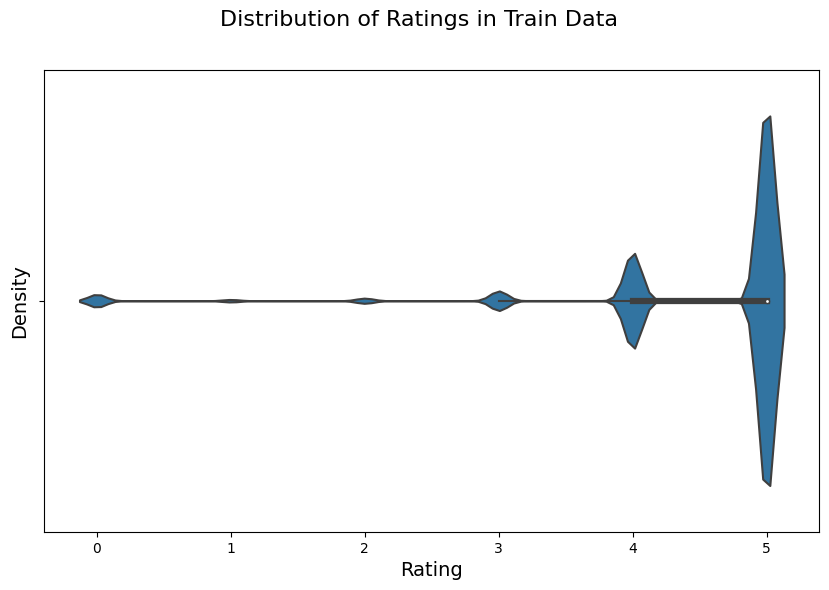

In [ ]:
# Violin plot of ratings
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Distribution of Ratings in Train Data', fontsize=16)

sns.violinplot(
    x='rating',
    data=interactions_train,
    ax=ax
)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

### 0.2 Classe recommandation

In [6]:
from abc import ABC, abstractmethod


class RecommendationSystem(ABC):
    @abstractmethod
    def fit(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame):
        raise NotImplementedError
    
    @abstractmethod
    def predict(self, user: pd.Series, k: int) -> list[int]:
        raise NotImplementedError

## Partie 1 : Système de recommendation simple

### 1.1 Recommendation par popularité

In [63]:
from typing_extensions import Literal, Self
from typing import Optional
class RecommendationPopularity(RecommendationSystem):
    def __init__(self, method: Literal["average", "count", "weighted_average", "imdb"] = "average", m: Optional[int] = None):
        super(RecommendationSystem, self).__init__()
        self.method = method
        self._sorted_recipes: list[int]
        if method != "imdb" and m is not None:
            raise ValueError("m can only be set for method imdb")
        self.m = m

    def _fit_average(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        recipe_avg = interactions_train.groupby('recipe_id')['rating'].mean()
        sorted_recipes_avg_id = recipe_avg.sort_values(ascending=False).index.to_list()
        self._sorted_recipes = sorted_recipes_avg_id
        return self
    
    def _fit_count(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        recipe_count = interactions_train.groupby('recipe_id')['rating'].count()
        sorted_recipes_count = recipe_count.sort_values(ascending=False).index.to_list()
        self._sorted_recipes = sorted_recipes_count
        return self
    
    def _fit_weighted_average(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        recipe_avg = interactions_train.groupby('recipe_id')['rating'].mean()
        recipe_count = interactions_train.groupby('recipe_id')['rating'].count()
        recipe_weighted_avg = recipe_avg * np.log10(recipe_count + 1)
        sorted_recipes_weighted_avg = recipe_weighted_avg.sort_values(ascending=False).index.to_list()
        self._sorted_recipes = sorted_recipes_weighted_avg
        return self
    
    def _fit_imdb(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        # R
        recipe_avg = interactions_train.groupby('recipe_id')['rating'].mean()
        # v
        recipe_count = interactions_train.groupby('recipe_id')['rating'].count()
        # C
        recipe_global_mean = interactions_train['rating'].mean()
        
        recipe_imdb = (
            (recipe_count / (recipe_count + self.m)) * recipe_avg \
                + (self.m / (recipe_count + self.m)) * recipe_global_mean
        )
        sorted_recipe_imdb = recipe_imdb.sort_values(ascending=False).index.to_list()
        self._sorted_recipes = sorted_recipe_imdb
        return self

    def fit(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        if self.method == "average":
            return self._fit_average(interactions_train, raw_recipes)
        elif self.method == "count":
            return self._fit_count(interactions_train, raw_recipes)
        elif self.method == "weighted_average":
            return self._fit_weighted_average(interactions_train, raw_recipes)
        elif self.method == "imdb":
            return self._fit_imdb(interactions_train, raw_recipes)
        else:
            raise ValueError(f"Unknown method {self.method}")
    
    def predict(self, user: Optional[pd.Series], k: int) -> list[int]:
        return self._sorted_recipes[:k]

In [128]:
recommandation_popularity = RecommendationPopularity(method="average")
recommandation_popularity.fit(interactions_train, raw_recipes)
recommanded_ids = recommandation_popularity.predict(None, 5)

print('Top 5 recipes by average popularity:')
print('-----------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean():0.4f}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print()

Top 5 recipes by average popularity:
-----------------------------------
Recipe id: 537458
Average rating: 5.0000
Recipe name: garlic and herb mashed potatoes

Recipe id: 123184
Average rating: 5.0000
Recipe name: morris family s cheese ball

Recipe id: 123217
Average rating: 5.0000
Recipe name: lemon linguini with chicken

Recipe id: 123209
Average rating: 5.0000
Recipe name: cinnamon biscuits

Recipe id: 283775
Average rating: 5.0000
Recipe name: almond roasted duck with chinese spices



In [129]:
recommandation_popularity = RecommendationPopularity(method="count")
recommandation_popularity.fit(interactions_train, raw_recipes)
recommanded_ids = recommandation_popularity.predict(None, 5)

print('Top 5 recipes by number of rating popularity:')
print('-----------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean():0.4f}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print()

Top 5 recipes by number of rating popularity:
-----------------------------------
Recipe id: 27208
Average rating: 4.4134
Recipe name: to die for crock pot roast

Recipe id: 89204
Average rating: 4.3470
Recipe name: crock pot chicken with black beans   cream cheese

Recipe id: 32204
Average rating: 4.6087
Recipe name: whatever floats your boat  brownies

Recipe id: 39087
Average rating: 4.6913
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Average rating: 4.7776
Recipe name: kittencal s italian melt in your mouth meatballs



Disadvantages of previous methods: 
- **Average rating**: recipes with only one five star review have an average of five. However, the review could have been made by a person who has very specific taste and loves the recipe.
- **Number of ratings**: recipes might appear a lot but not for a good reason. For example, a carbonara recipe with cream might get a lot of negative reviews from Italians.

Therefore, another method that combines average ratings and number of ratings should be implemented. 

For example, we can add the following information:


In [130]:
recommandation_popularity = RecommendationPopularity(method="weighted_average")
recommandation_popularity.fit(interactions_train, raw_recipes)
recommanded_ids = recommandation_popularity.predict(None, 5)

print('Top 5 recipes by weighted average:')
print('-----------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean():0.4f}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print()

Top 5 recipes by weighted average:
-----------------------------------
Recipe id: 39087
Average rating: 4.6913
Recipe name: creamy cajun chicken pasta

Recipe id: 69173
Average rating: 4.7776
Recipe name: kittencal s italian melt in your mouth meatballs

Recipe id: 32204
Average rating: 4.6087
Recipe name: whatever floats your boat  brownies

Recipe id: 27208
Average rating: 4.4134
Recipe name: to die for crock pot roast

Recipe id: 28148
Average rating: 4.7147
Recipe name: oven fried chicken chimichangas



Pour donner des recommendations en tenant compte de la popularité de la recette nous allons utiliser la formule inspirée du modèle de classement des films imbd décrit de la façon suivante : 
 [here](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#)  
![](https://drive.google.com/uc?export=view&id=12J_uJ86eOimr8Y0LHTGSMmUgkBnZu9cO)   

In [127]:
recommandation_popularity = RecommendationPopularity(method="imdb", m = 50)
recommandation_popularity.fit(interactions_train, raw_recipes)
recommanded_ids = recommandation_popularity.predict(None, 5)

print('Top 5 recipes by imdb:')
print('-----------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean():0.4f}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print()

Top 5 recipes by imdb:
-----------------------------------
Recipe id: 113299
Average rating: 4.9077
Recipe name: peanut butter cup cookies  tarts

Recipe id: 128566
Average rating: 4.9307
Recipe name: homemade chicken pot pie

Recipe id: 111777
Average rating: 4.8800
Recipe name: chicken pot pie with 2 crusts

Recipe id: 80413
Average rating: 4.8698
Recipe name: homemade hamburger buns  bread machine

Recipe id: 42976
Average rating: 4.9126
Recipe name: brown sugar bundt cake



### 1.2 Recommendation basée sur les étapes et descriptions de la recette

In [139]:
TAILLE = 1_000

raw_recipes_subset = raw_recipes.sample(TAILLE, random_state=42).dropna().reset_index()

In [140]:
from nltk import word_tokenize          
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords


In [184]:
from typing import Iterable
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`','[',']']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
        
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]
    
class RecommendationContentBased(RecommendationSystem):
    def __init__(
            self,
            similarity: Literal["cosine", "euclidean"] = "cosine",
            features: Literal["name", "description", "ingredients"] = "name",
            max_features: int = 500,
        ) -> None:
        super(RecommendationSystem, self).__init__()
        self.similarity = similarity
        self.features = features
        self.max_features = max_features

    def fit(self, interactions_train: pd.DataFrame, raw_recipes: pd.DataFrame) -> Self:
        # Make a dictionary between recipe_id and index
        self.indices = pd.Series(raw_recipes.index, index=raw_recipes['name'])
        self.id = raw_recipes["id"]
        name_description_ingredient = raw_recipes[self.features].fillna("")
        name_description_ingredient.fillna("", inplace=True)
        tokenizer = StemTokenizer()
        token_stop = tokenizer(' '.join(set(stopwords.words('english')) ))
        tfidf = TfidfVectorizer(
            stop_words=token_stop,
            tokenizer=tokenizer,
            max_features=self.max_features
        )
        self.tfidf_matrix = tfidf.fit_transform(name_description_ingredient)
        if self.similarity == "cosine":
            self.similarities = cosine_distances(self.tfidf_matrix, self.tfidf_matrix)
        elif self.similarity == "euclidean":
            self.similarities = euclidean_distances(self.tfidf_matrix, self.tfidf_matrix)
        else:
            raise ValueError(f"Unknown similarity {self.similarity}")

    def predict(self, name: str, k: int) -> list[int]:
        recipe_idx = self.indices[name]
        closest = self.similarities[recipe_idx].argsort()[0:k+1]
        return self.id[closest].tolist()

In [188]:
recommandation_content = RecommendationContentBased(similarity="cosine", features="name")
recommandation_content.fit(interactions_train, raw_recipes_subset)
recipe = raw_recipes_subset.iloc[3]["name"]
recommanded_ids = recommandation_content.predict(recipe, 5)

print(f"Recipe: {recipe}")
print('----------------------------------')
print(f'Top 5 recipes by name similarity:')
print('----------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes_subset.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean()}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print()

Recipe: pork tenderloin with hoisin
----------------------------------
Top 5 recipes by name similarity:
----------------------------------
Recipe id: 78450
Average rating: 4.857142857142857
Recipe name: pork tenderloin with hoisin

Recipe id: 41694
Average rating: 4.818181818181818
Recipe name: hoisin and bourbon glazed pork tenderloin

Recipe id: 55242
Average rating: 4.153846153846154
Recipe name: barbecued red roast pork tenderloin

Recipe id: 196529
Average rating: 5.0
Recipe name: pork saltimbocca

Recipe id: 75579
Average rating: nan
Recipe name: lobster stuffed beef tenderloin

Recipe id: 531469
Average rating: nan
Recipe name: roasted pork shoulder  pernil al horno



/home/europe/Desktop/david/projet_MODIA/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [190]:
recommandation_content = RecommendationContentBased(similarity="cosine", features="description")
recommandation_content.fit(interactions_train, raw_recipes_subset)
recipe = raw_recipes_subset.iloc[3]["name"]
recommanded_ids = recommandation_content.predict(recipe, 5)

print(f"Recipe: {recipe}")
print('-----------------------------------------')
print(f'Top 5 recipes by description similarity:')
print('-----------------------------------------')
for recommanded_id in recommanded_ids:
    interaction = interactions_train.query("recipe_id == @recommanded_id")
    raw = raw_recipes_subset.query("id == @recommanded_id")
    print(f'Recipe id: {recommanded_id}')
    print(f'Average rating: {interaction["rating"].mean()}')
    print(f'Recipe name: {raw["name"].values[0]}')
    print(f"Recipe description: {raw['description'].values[0]}")
    print()

/home/europe/Desktop/david/projet_MODIA/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Recipe: pork tenderloin with hoisin
-----------------------------------------
Top 5 recipes by description similarity:
-----------------------------------------
Recipe id: 78450
Average rating: 4.857142857142857
Recipe name: pork tenderloin with hoisin
Recipe description: another keeper from bonnie stern's heartsmart cooking series. the pork is sauteed in the marinade with no extra fat. the sauce is delicious and we have enjoyed it with chicken breast and beef as well.

Recipe id: 389269
Average rating: 5.0
Recipe name: garlic and mustard chicken
Recipe description: this dish is healthy and delicious and so easy to make.
i like to eat it with recipe #313506  and a mixed salad.
instead of creme fraiche you could use sour cream. and
instead of 8 chicken thighs you could use 4 chicken breast halves.
you can cook it on the grill or in the oven. i had a hard time listing cooking times, so just make sure the chicken is done and enjoy :)

Recipe id: 291671
Average rating: nan
Recipe name: iri